In [8]:
from GRDECL2VTK import *
from GRDECL_Parser_my import GRDECL_Parser_my
import fileinput
import sys
import os

D:\Work\QA_QC_proj\utils\GRDCL_parser\GRDECL2VTK.py:23: UserWarning: No vtk module loaded.
  warnings.warn("No vtk module loaded.")
D:\Work\QA_QC_proj\utils\GRDCL_parser\GRDECL_FaultProcess.py:37: UserWarning: No shapely module loaded.
  warnings.warn("No shapely module loaded.")


In [9]:
def replaceAll(file, searchExp, replaceExp):
    for line in fileinput.input(file, inplace=1):
        if searchExp in line:
            line = line.replace(searchExp,replaceExp)
        sys.stdout.write(line)

In [10]:
directory = 'input/directly/'

In [11]:
grid_file = 'input/' + 'grid_1.GRDECL'

replaceAll(grid_file,'-- Generated : Petrel'," ")
model_grid_data_2 = GeologyModel(filename=grid_file)

[Input] Reading ECLIPSE/PETREL file "input/grid_1.GRDECL" ....
     Grid Type=CornerPoint
     Grid Dimension(NX,NY,NZ): (100 x 56 x 30)
     NumOfGrids=168000
     NumOfKeywords=10
     Reading Keywords [SPECGRID] 
     [Warnning] Unsupport keywords[COORDSYS]
     [Warnning] Unsupport keywords[]
.....Done!


In [12]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(directory) if isfile(join(directory, f))]
onlyfiles[:]

['Poro1_2.GRDECL', 'Poro1_3.GRDECL', 'Poro1_4.GRDECL', 'Poro1_5.GRDECL']

In [13]:
for i in onlyfiles[:]:
    poro_file = directory + i
    replaceAll(poro_file,'-- Generated : Petrel'," ")
    poro_data = GRDECL_Parser_my(filename=poro_file, grid_data=False, GRID_type=model_grid_data_2.GRDECL_Data.GRID_type, grid_dim=[
                                    model_grid_data_2.GRDECL_Data.NX, model_grid_data_2.GRDECL_Data.NY, model_grid_data_2.GRDECL_Data.NZ])
    model_grid_data_2.GRDECL_Data.SpatialDatas[i] = poro_data.PORO

Starting custom script!!!
[Input] Reading ECLIPSE/PETREL file "input/directly/Poro1_2.GRDECL" ....
.....Done!
Starting custom script!!!
[Input] Reading ECLIPSE/PETREL file "input/directly/Poro1_3.GRDECL" ....
.....Done!
Starting custom script!!!
[Input] Reading ECLIPSE/PETREL file "input/directly/Poro1_4.GRDECL" ....
.....Done!
Starting custom script!!!
[Input] Reading ECLIPSE/PETREL file "input/directly/Poro1_5.GRDECL" ....
.....Done!


In [14]:
result = model_grid_data_2.GRDECL_Data.SpatialDatas
result

{'Poro1_2.GRDECL': array([0., 0., 0., ..., 0., 0., 0.]),
 'Poro1_3.GRDECL': array([0., 0., 0., ..., 0., 0., 0.]),
 'Poro1_4.GRDECL': array([0.166192, 0.170196, 0.164337, ..., 0.      , 0.      , 0.      ]),
 'Poro1_5.GRDECL': array([0.      , 0.      , 0.173912, ..., 0.      , 0.      , 0.      ])}

In [20]:
mask = result[k] != 0
result[k][mask]

NameError: name 'k' is not defined

In [21]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [22]:

for k in result:
    print(k)
    mask = result[k] != 0    
    ecdf = sm.distributions.ECDF(result[k][mask]) 
    sns.lineplot(ecdf.x, ecdf.y,label = k)    
    

Poro1_2.GRDECL


TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

Poro1_2.GRDECL
Poro1_3.GRDECL
Poro1_4.GRDECL
Poro1_5.GRDECL


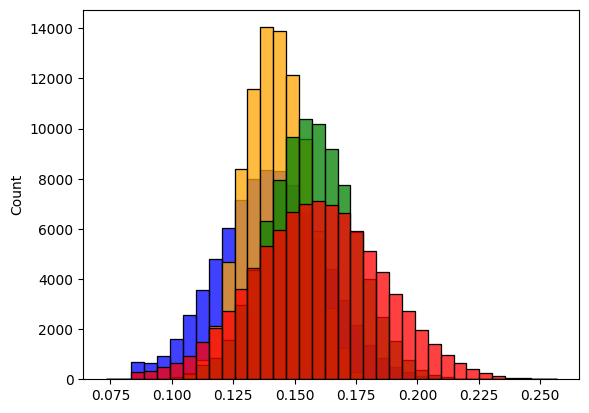

In [23]:
c = ['blue','orange','green','red']
count = 0
for k in result:
    print(k)
    mask = result[k] != 0    
    sns.histplot(result[k][mask],bins = 35,label = k,color = c[count])   
    count +=1
plt.show()